In [28]:
import pandas as pd
import seaborn as sns

In [29]:
pd.set_option("max_columns", 80)

In [30]:
df = pd.read_csv('data/interim_data/cdc_data_cleaned.csv')

In [5]:
# Link to Census Data

#def read_csv_from_dropbox(dropbox_link):
    #path = dropbox_link[0:-1] + "1"
    #df = pd.read_csv(path)
    #return df
# df_census = read_csv_from_dropbox ('https://www.dropbox.com/s/pmxyfcyw5r5m3vf/Census%20Population%20Data.csv?dl=0')

In [31]:
df.head()

,resident_status,level_of_education,month_of_death,age,place_of_death_patient_status,marital_status,day_of_week_of_death,year_data_collected,manner_of_death,was_autopsy_done,place_of_injury_for_icd_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_causes_of_death,113_causes_of_death,130_causes_of_infant_death,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,RESIDENTS,Not Available,February,37,"Hospital, clinic or Medical Center",Married,Tuesday,2015,Natural,No,Not Available,O268,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",4,11O268,21O995,31O268,2,O268,O903,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
1,RESIDENTS,Not Available,January,56,"Hospital, clinic or Medical Center",Widowed,Tuesday,2015,Natural,No,Not Available,O268,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O268,21O971,31O971,2,O268,O971,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
2,RESIDENTS,Not Available,March,31,Other,Married,Tuesday,2015,Natural,No,Not Available,O881,Obstetric embolism,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O993,21O881,Not Available,1,O881,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
3,INTRASTATE NONRESIDENTS,Not Available,April,24,"Hospital, clinic or Medical Center",Divorced,Thursday,2015,Not Available,Unknown,Not Available,O065,Other and unspecified pregnancy with abortive ...,Pregnancy with abortive outcome,Not Available,"Pregnancy, childbirth and the puerperium",2,11O080,21O069,Not Available,1,O065,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
4,INSTRASTATE NONRESIDENTS,Not Available,July,28,"Hospital, clinic or Medical Center","Never married, Single",Saturday,2015,Natural,No,Not Available,O998,Indirect obstetric deaths,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O994,21O998,Not Available,2,O998,O994,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black


In [32]:
df['race'].unique()

array(['Black', 'White', 'American Indian (includes Aleuts and Eskimos)',
       'Chinese', 'Filipino', 'Asian Indian',
       'Other Asian or Pacific Islander in areas reporting codes 18-58',
       'Combined other Asian or Pacific Islander, includes codes 18-68',
       'Japanese', 'Vietnamese', 'Korean',
       'Hawaiian (includes Part-Hawaiian)', 'Guamanian', 'Samoan'],
      dtype=object)

In [33]:
df['race_recode_3'].unique()

array(['Black', 'White', 'Races other than White or Black'], dtype=object)

In [34]:
df['race_recode_5'].unique()

array(['Black', 'White', 'American Indian', 'Asian or Pacific Islander'],
      dtype=object)

In [35]:
df['hispanic_origin'].unique()

array(['Non – Hispanic', 'Mexican', 'South American', 'Central American',
       'Puerto Rican', 'Unknown', 'Central and South American',
       'Other Hispanic', 'Latin American', 'Cuban', 'Dominican',
       'Spaniard'], dtype=object)

In [36]:
df['hispanic_originrace_recode'].unique()

array(['Non - Hispanic black', 'Non - Hispanic white', 'Mexican',
       'Non - Hispanic other races', 'Central or South American',
       'Puerto Rican', 'Hispanic origin unknown',
       'Other or unknown Hispanic', 'Cuban'], dtype=object)

In [37]:
df['manner_of_death'].unique()

array(['Natural', 'Not Available', 'Could not determine',
       'Pending investigation', 'Accident', 'Homicide', 'Suicide'],
      dtype=object)

In [38]:
df.shape

(7135, 29)

In [39]:
df[df['hispanic_origin'] == 'Non – Hispanic'].count()

resident_status                                        5993
level_of_education                                     5993
month_of_death                                         5993
age                                                    5993
place_of_death_patient_status                          5993
marital_status                                         5993
day_of_week_of_death                                   5993
year_data_collected                                    5993
manner_of_death                                        5993
was_autopsy_done                                       5993
place_of_injury_for_icd_w00_y34_except_y06_and_y07_    5993
icd_code_10th_revision                                 5993
358_causes_of_death                                    5993
113_causes_of_death                                    5993
130_causes_of_infant_death                             5993
39_cause_recode                                        5993
number_of_entity_axis_conditions        

---

# Reusable DFs

In [40]:
df_hispanic = df[df["hispanic_origin"] != "Non – Hispanic"]

In [41]:
df_non_hispanic = df[df["hispanic_origin"] == "Non – Hispanic"]

---

In [42]:
# add ethnicity column
df_hispanic['ethnicity'] = 'Hispanic'
df_non_hispanic['ethnicity'] = df_non_hispanic['race_recode_3']

df = pd.concat([df_hispanic, df_non_hispanic], axis=0, join='inner')
df["ethnicity"].replace({"Races other than White or Black": "Other"}, inplace=True)
df

<ipython-input-42-a6dae51f7722>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hispanic['ethnicity'] = 'Hispanic'
<ipython-input-42-a6dae51f7722>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_hispanic['ethnicity'] = df_non_hispanic['race_recode_3']


,resident_status,level_of_education,month_of_death,age,place_of_death_patient_status,marital_status,day_of_week_of_death,year_data_collected,manner_of_death,was_autopsy_done,place_of_injury_for_icd_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_causes_of_death,113_causes_of_death,130_causes_of_infant_death,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,ethnicity
25,RESIDENTS,3.0,January,49,"Hospital, clinic or Medical Center",Divorced,Tuesday,2015,Natural,No,Not Available,O266,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",9,11O268,21O988,22O992,2,O266,O268,Not Available,White,White,White,Mexican,Mexican,Hispanic
27,RESIDENTS,3.0,January,40,"Hospital, clinic or Medical Center",Married,Sunday,2015,Natural,No,Not Available,O266,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",6,11O995,21O995,31O266,2,O266,O268,Not Available,White,White,White,Mexican,Mexican,Hispanic
30,RESIDENTS,9.0,April,35,"Hospital, clinic or Medical Center",Married,Friday,2015,Natural,Yes,Not Available,O720,Hemorrhage of pregnancy and childbirth and pla...,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O994,21O720,22O991,1,O720,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
32,RESIDENTS,6.0,April,41,"Hospital, clinic or Medical Center",Married,Wednesday,2015,Natural,No,Not Available,O721,Hemorrhage of pregnancy and childbirth and pla...,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O721,12O991,21O95,1,O721,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
36,INTRASTATE NONRESIDENTS,3.0,June,28,"Hospital, clinic or Medical Center",Married,Sunday,2015,Natural,No,Not Available,O038,Spontaneous abortion,Pregnancy with abortive outcome,Not Available,"Pregnancy, childbirth and the puerperium",8,11O996,12O998,13O995,1,O038,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,RESIDENTS,4.0,October,33,"Hospital, clinic or Medical Center",Married,Tuesday,2009,Not Available,No,Not Available,O998,Indirect obstetric deaths,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",1,11O998,Not Available,Not Available,1,O998,Not Available,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black,Black
7130,RESIDENTS,4.0,October,27,"Hospital, clinic or Medical Center",Married,Thursday,2009,Natural,No,Not Available,O149,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O149,12O759,Not Available,1,O149,Not Available,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black,Black
7131,RESIDENTS,6.0,December,25,"Hospital, clinic or Medical Center","Never married, Single",Wednesday,2009,Not Available,No,Not Available,O268,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O268,21O995,Not Available,1,O268,Not Available,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black,Black
7133,RESIDENTS,3.0,December,40,"Hospital, clinic or Medical Center","Never married, Single",Saturday,2009,Natural,Yes,Not Available,O96,"Other deaths related to pregnancy, childbirth ...","Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O96,61

In [43]:
df.shape

(7135, 30)

3417 rows in dataset => 3417 deaths
1108 black women deaths
2113 white women deaths
196 other races deaths

In [294]:
# Find total population of USA separated by race.
# If possible by white/black/other and by hispanic and non hispanic.

In [45]:
column1 = 'ethnicity'
column2 = 'place_of_death_patient_status'

grouped_by_ethnicity_and_death_place = df.groupby([column1, column2]).size()
grouped_by_ethnicity_and_death_place

ethnicity  place_of_death_patient_status     
Black      Descendent's home                       38
           Hospital, clinc or Medical Center       47
           Hospital, clinic or Medical Center    2107
           Nursing home/long term care             24
           Other                                   52
           Place of death unknown                  29
Hispanic   Descendent's home                       18
           Hospital, clinc or Medical Center        6
           Hospital, clinic or Medical Center    1076
           Nursing home/long term care             10
           Other                                   30
           Place of death unknown                   2
Other      Descendent's home                        2
           Hospital, clinc or Medical Center        4
           Hospital, clinic or Medical Center     379
           Nursing home/long term care              5
           Other                                    7
           Place of death unknown   

# How are hispanics represented among different races?

In [46]:
def group_by_race(df):
    return df.groupby(df['race_recode_3']).size()

In [47]:
grouped_by_race = group_by_race(df)
grouped_by_race

race_recode_3
Black                              2321
Races other than White or Black     413
White                              4401
dtype: int64

In [48]:
group_by_race(df_hispanic)

race_recode_3
Black                                24
Races other than White or Black      15
White                              1103
dtype: int64

In [49]:
group_by_race(df_non_hispanic)

race_recode_3
Black                              2297
Races other than White or Black     398
White                              3298
dtype: int64

# How does the number of total deaths look like?

<AxesSubplot:title={'center':'Bar plot of deaths per race from 2013 to 2015'}, xlabel='ethnicity'>

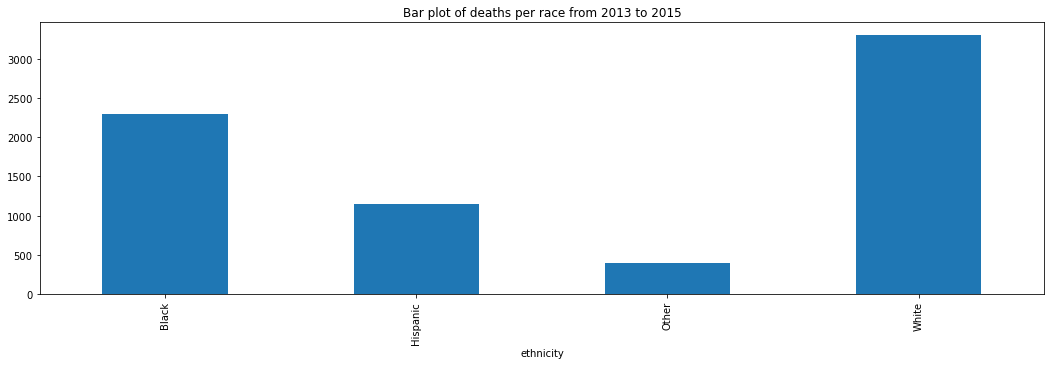

In [50]:
df.groupby(df['ethnicity']).size().plot.bar(
    title=f'Bar plot of deaths per race from 2013 to 2015',
    figsize=(18,5)
)

# We Need to find total population of black/white women to see what's the maternal mortality percentage.
# If possible, do same analysis including hispanic, and same anaylisys excluding hispanic

# What does marital status look like proportionate to race/ethnicity?

In [71]:
x=df.groupby(["race"]) ["marital_status"].value_counts().head


In [72]:
print (x)

<bound method NDFrame.head of race                                                            marital_status        
American Indian (includes Aleuts and Eskimos)                   Never married, Single       63
                                                                Married                     42
                                                                Divorced                    16
                                                                Widowed                      2
                                                                Marital Status unknown       1
Asian Indian                                                    Married                     41
                                                                Never married, Single        3
Black                                                           Never married, Single     1418
                                                                Married                    671
                            

<AxesSubplot:xlabel='marital_status'>

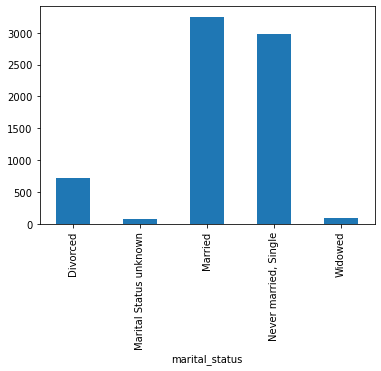

In [73]:
df.groupby(df['marital_status']).size().plot.bar()

In [80]:
def create_marital_status_heatmap(df, column):
    event_count_table = pd.crosstab(
        index=df['marital_status'],
        columns=df[column],
        normalize='index'
    )
    
    return sns.heatmap(event_count_table, cmap='Greens', linewidths=1.5)

<AxesSubplot:xlabel='race', ylabel='marital_status'>

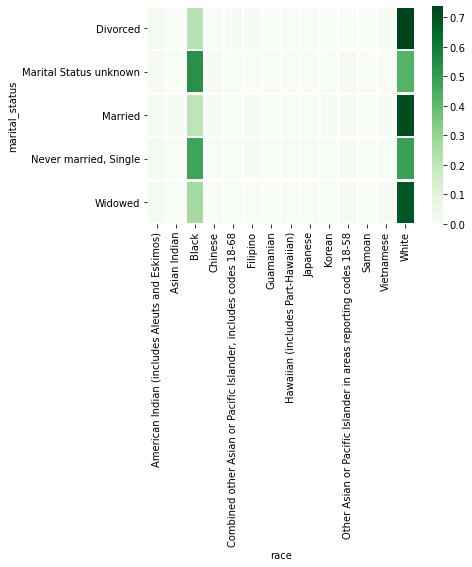

In [81]:
create_marital_status_heatmap(df, 'race')

In [78]:
def create_marital_status_heatmap(df, column):
    event_count_table = pd.crosstab(
        index=df['marital_status'],
        columns=df[column],
        normalize='index'
    )
    
    return sns.heatmap(event_count_table, cmap='Greens', linewidths=1.5)

<AxesSubplot:xlabel='ethnicity', ylabel='marital_status'>

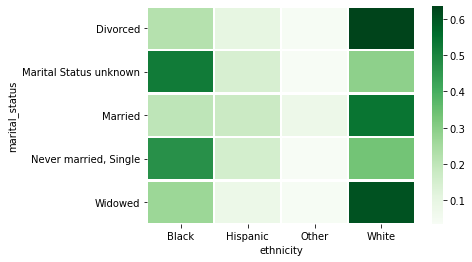

In [79]:
create_marital_status_heatmap(df, 'ethnicity')

# How does the number of deaths change as the years go by?

In [67]:
df_deaths_by_year = df.groupby(['year_data_collected']).size()
df_deaths_by_year

year_data_collected
2009     960
2010     829
2011     936
2012     993
2013    1142
2014    1131
2015    1144
dtype: int64

<AxesSubplot:xlabel='year_data_collected'>

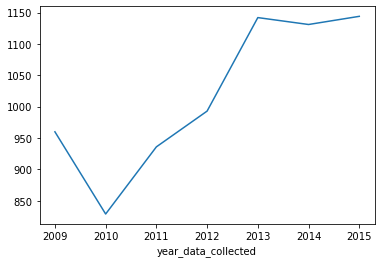

In [68]:
df_deaths_by_year.plot.line()

**It seems that there is a growing trend in the number of maternal deaths**

In [69]:
df_grouped_by_ethnicity_and_year = df.groupby(['ethnicity', 'year_data_collected']).size()
df_grouped_by_ethnicity_and_year = df_grouped_by_ethnicity_and_year.reset_index()
df_grouped_by_ethnicity_and_year = df_grouped_by_ethnicity_and_year.rename(columns={0:'count'})
df_grouped_by_ethnicity_and_year

,ethnicity,year_data_collected,count
0,Black,2009,305
1,Black,2010,262
2,Black,2011,301
3,Black,2012,333
4,Black,2013,362
5,Black,2014,361
6,Black,2015,373
7,Hispanic,2009,184
8,Hispanic,2010,157
9,Hispanic,2011,133


In [70]:
ax = sns.lineplot(
    data=df_grouped_by_race_and_year,
    x='year_data_collected',
    y="count",
    hue='race_recode_3',
)
ax.set_xlabel('Year')

NameError: name 'df_grouped_by_race_and_year' is not defined

**The growing trend in the total number of maternal deaths is true for the different ethnic groups looked at**

# Do different races/ethnicities die of the same causes proportionally?

In [30]:
def create_ethnicity_heatmap(df, column):
    event_count_table = pd.crosstab(
        index=df['ethnicity'],
        columns=df[column],
        normalize='index'
    )
    
    return sns.heatmap(event_count_table, cmap='Reds', linewidths=1.5)

<AxesSubplot:xlabel='place_of_death_patient_status', ylabel='ethnicity'>

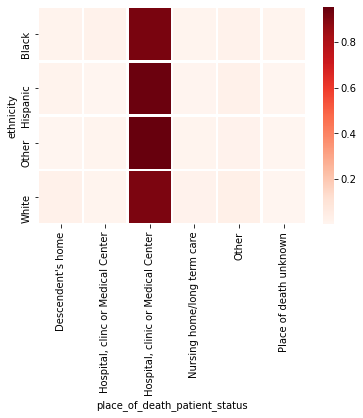

In [31]:
create_ethnicity_heatmap(df, 'place_of_death_patient_status')

<AxesSubplot:xlabel='manner_of_death', ylabel='ethnicity'>

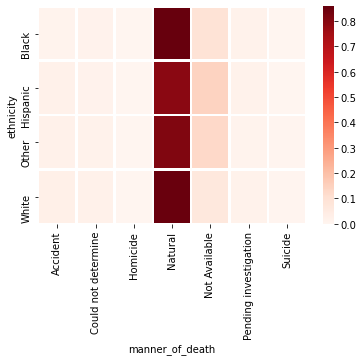

In [33]:
create_ethnicity_heatmap(df, 'manner_of_death')

<AxesSubplot:xlabel='358_causes_of_death', ylabel='ethnicity'>

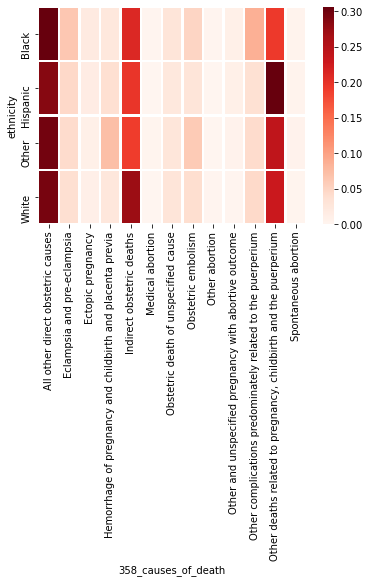

In [34]:
create_ethnicity_heatmap(df, '358_causes_of_death')

<AxesSubplot:xlabel='113_causes_of_death', ylabel='ethnicity'>

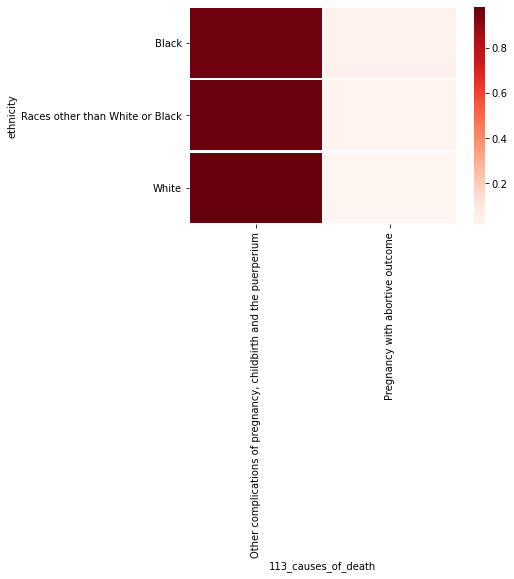

In [36]:
create_ethnicity_heatmap(df_non_hispanic, '113_causes_of_death')

<AxesSubplot:xlabel='39_cause_recode', ylabel='ethnicity'>

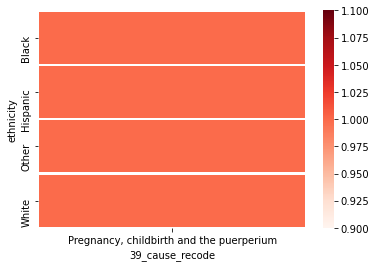

In [37]:
create_ethnicity_heatmap(df, '39_cause_recode')

<AxesSubplot:xlabel='day_of_week_of_death', ylabel='ethnicity'>

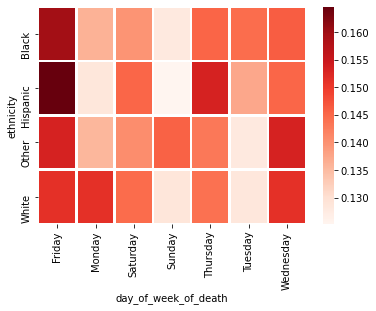

In [38]:
create_ethnicity_heatmap(df, 'day_of_week_of_death')

In [39]:
create_race_heatmap(df, 'age')

NameError: name 'create_race_heatmap' is not defined

**The main causes of death seem to be the same for each race analyzed.  It might be worth to investigate further why black women die more of eclampsia and pre-eclampsia.**

----

# Is the percentage of missing data constant for different ethnicities?

In [40]:
def get_na_numbers_per_ethnicity(df, ethnicity, column_name):
    df_ethnicity = df[df["ethnicity"] == ethnicity]
    na_ethnicity = df_ethnicity[df[column_name] == 'Not Available']
    ethnicity_pct = len(na_ethnicity) / len(df_ethnicity)
    return ethnicity_pct

In [41]:
def compare_na_numbers_per_ethnicity(df, column_name):
    white = get_na_numbers_per_race(df, 'White', column_name)
    black = get_na_numbers_per_race(df, 'Black', column_name)
    hispanic = get_na_numbers_per_race(df, 'Hispanic', column_name)
    other = get_na_numbers_per_race(df, 'Other', column_name)

        
    print(f'The number of N/A records for the column {column_name} are {white} for white, {black} for black, {hispanic} for hispanic, {other} for other races')

In [42]:
compare_na_numbers_per_ethnicity(df, 'manner_of_death')

NameError: name 'get_na_numbers_per_race' is not defined

In [317]:
compare_na_numbers_per_ethnicity(df, 'icd_code_10th_revision')

The number of N/A records for the column icd_code_10th_revision are 0.0 for white, 0.0 for black, 0.0 for hispanic, 0.0 for other races


<ipython-input-150-b9690ea48c66>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  na_ethnicity = df_ethnicity[df[column_name] == 'Not Available']


In [318]:
# Finish missing values analysis

-----

# What's the most common icd causes of death among each race?  Does this change when we include/exclude hispanics?

In [319]:
def most_common_icd_10_code(df):
    icd_causes_of_death_by_ethnicity = df.groupby(["ethnicity", "icd_code_10th_revision"]).size().to_frame().reset_index()
    icd_causes_of_death_by_ethnicity = icd_causes_of_death_by_ethnicity.rename(columns={0:'count'})
    icd_causes_of_death_by_ethnicity = icd_causes_of_death_by_ethnicity.sort_values(['ethnicity', 'count'], ascending = (True, False))
    icd_causes_of_death_by_ethnicity = icd_causes_of_death_by_ethnicity.groupby('ethnicity').head(5)
    return icd_causes_of_death_by_ethnicity

In [320]:
most_common_icd_10_code(df)

,ethnicity,icd_code_10th_revision,count
51,Black,O268,387
119,Black,O998,196
115,Black,O994,167
100,Black,O960,159
95,Black,O903,151
159,Hispanic,O268,177
194,Hispanic,O96,122
210,Hispanic,O998,107
196,Hispanic,O961,105
195,Hispanic,O960,98


In [321]:
df_eclampsia = df[df['358_causes_of_death'] == 'Eclampsia and pre-eclampsia']

In [322]:
most_common_icd_10_code(df_eclampsia)

,ethnicity,icd_code_10th_revision,count
9,Black,O16,42
5,Black,O149,38
8,Black,O159,33
4,Black,O142,10
3,Black,O141,6
14,Hispanic,O149,13
16,Hispanic,O159,13
17,Hispanic,O16,7
13,Hispanic,O142,6
12,Hispanic,O141,5


Looking at the most common icd 10 codes per race, we don't see any signifcant trend.  We then decided to take a further look at the women with pre-elampsia and eclampsia, since we noticed in an earlier step that black women seem to die more from it when compared to other races.
The number of deaths of Black Women in the top 3 categories is very high, considering that they represent a much smaller part of the population.
As pre-elampsia and eclampsia are known high risk factors, maybe some of those deaths could be prevented. 

In [323]:
most_common_icd_10_code(df_non_hispanic)

,ethnicity,icd_code_10th_revision,count
51,Black,O268,387
119,Black,O998,196
115,Black,O994,167
100,Black,O960,159
95,Black,O903,151
141,Races other than White or Black,O268,64
184,Races other than White or Black,O998,39
171,Races other than White or Black,O960,36
172,Races other than White or Black,O961,28
182,Races other than White or Black,O994,25


In [324]:
df_eclampsia_non_hispanic = df[(df['358_causes_of_death'] == 'Eclampsia and pre-eclampsia') & (df["hispanic_origin"] == "Non – Hispanic")]

In [325]:
df_eclampsia_non_hispanic

,resident_status,level_of_education,month_of_death,age,place_of_death_patient_status,marital_status,day_of_week_of_death,year_data_collected,manner_of_death,was_autopsy_done,place_of_injury_for_icd_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_causes_of_death,113_causes_of_death,130_causes_of_infant_death,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,ethnicity
7,RESIDENTS,Not Available,October,38,"Hospital, clinic or Medical Center","Never married, Single",Saturday,2015,Could not determine,Yes,Not Available,O16,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",4,11O268,21O992,31O998,2,O16,O268,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black,Black
19,RESIDENTS,4.0,September,26,"Hospital, clinic or Medical Center","Never married, Single",Sunday,2015,Natural,No,Not Available,O150,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O159,21O16,Not Available,3,O150,O159,O16,White,White,White,Non – Hispanic,Non - Hispanic white,White
24,RESIDENTS,3.0,January,39,"Hospital, clinic or Medical Center","Never married, Single",Thursday,2015,Natural,Yes,Not Available,O159,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",1,11O159,Not Available,Not Available,1,O159,Not Available,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black,Black
26,RESIDENTS,5.0,January,36,"Hospital, clinic or Medical Center",Married,Friday,2015,Natural,Yes,Not Available,O149,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",6,11O268,21O998,31O759,3,O149,O249,O268,White,White,White,Non – Hispanic,Non - Hispanic white,White
31,RESIDENTS,no education item on certificate,April,29,"Hospital, clinic or Medical Center","Never married, Single",Sunday,2015,Natural,Yes,Not Available,O16,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",1,11O16,Not Available,Not Available,1,O16,Not Available,Not Available,American Indian (includes Aleuts and Eskimos),Races other than White or Black,American Indian,Non – Hispanic,Non - Hispanic other races,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7064,RESIDENTS,6.0,July,37,"Hospital, clinic or Medical Center",Married,Sunday,2009,Natural,No,Not Available,O149,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O994,21O994,31O149,1,O149,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white,White
7075,RESIDENTS,Not Available,May,35,"Hospital, clinic or Medical Center",Married,Thursday,2009,Natural,Yes,Not Available,O149,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O149,61O249,62O992,2,O149,O249,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white,White
7084,INTRASTATE NONRESIDENTS,Not Available,August,20,"Hospital, clinic or Medical Center","Never married, Single",Saturday,2009,Natural,Yes,Not Available,O141,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",5,11O991,21O998,31O141,2,O141,O903,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white,White
7115,INTRASTATE NONRESIDENTS,3.0,June,25,"Hospital, clinic or Medical Center","Never married, S

In [326]:
most_common_icd_10_code(df_eclampsia_non_hispanic)

,ethnicity,icd_code_10th_revision,count
9,Black,O16,42
5,Black,O149,38
8,Black,O159,33
4,Black,O142,10
3,Black,O141,6
13,Other,O149,5
14,Other,O159,4
12,Other,O142,3
15,Other,O16,3
10,Other,O11,1


---

In [327]:
df['level_of_education'].describe()

count     7135
unique      10
top        3.0
freq      2381
Name: level_of_education, dtype: object

In [328]:
df['level_of_education'].unique()

array(['3.0', '9.0', '6.0', 'no education item on certificate', '5.0',
       '4.0', '7.0', '2003 revision of education item on certificate',
       '8.0', 'Not Available'], dtype=object)